In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('Data/airline-passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
fitted_model = ExponentialSmoothing(train_data['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/Users/imac/workplace/Github/Learning/udemy/python/time series/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [11]:
test_predictions = fitted_model.forecast(36)

In [12]:
test_predictions

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
1958-07-01    521.795218
1958-08-01    514.513539
1958-09-01    446.216769
1958-10-01    385.430905
1958-11-01    339.645052
1958-12-01    381.455595
1959-01-01    401.210077
1959-02-01    387.159065
1959-03-01    455.812268
1959-04-01    450.049478
1959-05-01    459.537892
1959-06-01    540.114624
1959-07-01    595.671442
1959-08-01    587.358816
1959-09-01    509.392531
1959-10-01    440.000550
1959-11-01    387.732296
1959-12-01    435.462413
1960-01-01    458.013752
1960-02-01    441.973385
1960-03-01    520.346568
1960-04-01    513.767878
1960-05-01    524.599670
1960-06-01    616.584526
1960-07-01    680.007127
1960-08-01    670.517593
1960-09-01    581.512772
1960-10-01    502.296214
1960-11-01    442.627774
1960-12-01    497.115563
1961-01-01    522.859740
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

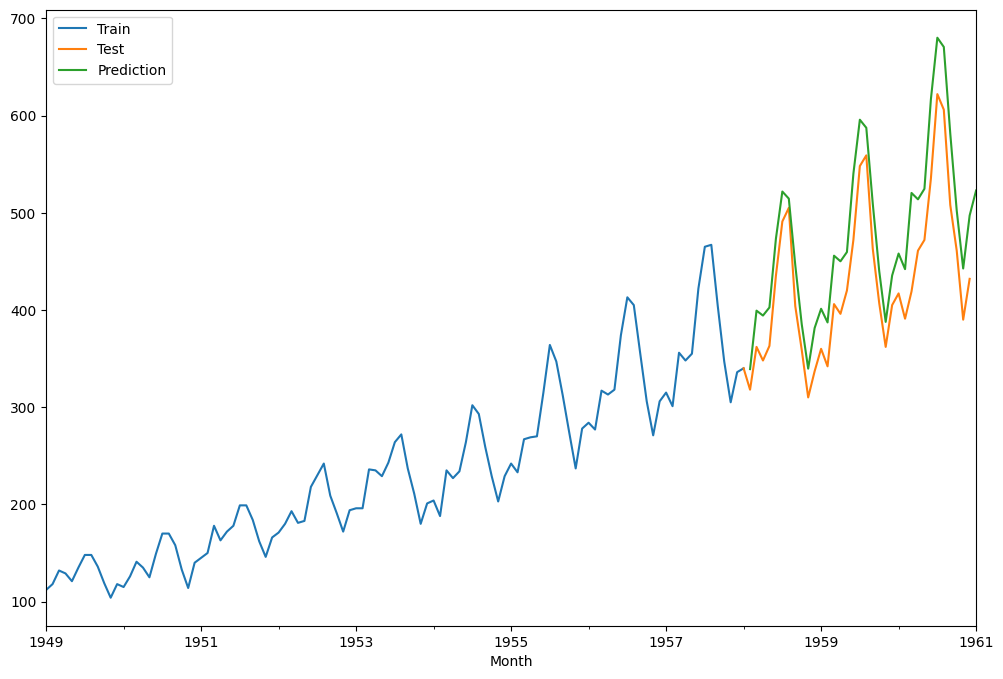

In [14]:
train_data['Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True, label='Prediction')

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
test_data.describe()

,Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [22]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92820898138402

In [21]:
mean_absolute_error(test_data, test_predictions)

63.03104082299123

In [23]:
final_model = ExponentialSmoothing(train_data['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/Users/imac/workplace/Github/Learning/udemy/python/time series/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [24]:
forecast_predictions =  final_model.forecast(36)

<Axes: xlabel='Month'>

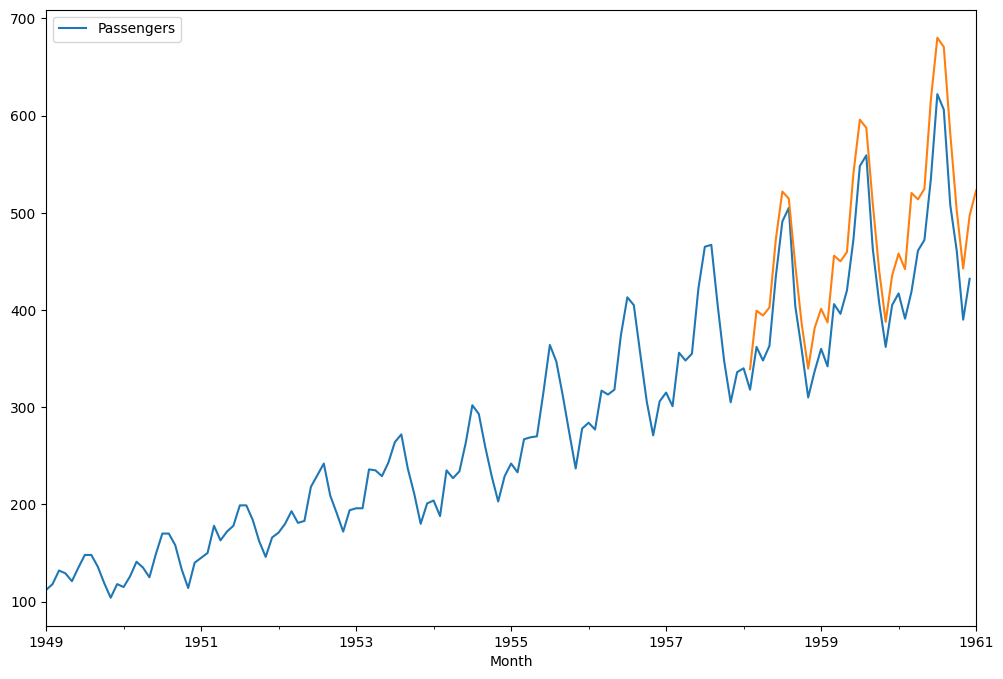

In [25]:
df.plot(figsize=(12,8))
forecast_predictions.plot()